In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Cust_seg.csv')
df

,Customer ID,A,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,4/10/2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11/6/2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,6/5/2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,9/2/2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,9/10/2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,1/1/2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,6/4/2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [5]:
print(df.head())
print(df.info())
print(df.describe())

   Customer ID   A  Gender Marital Status    Education Level  \
0        84966  23  Female        Married   Associate Degree   
1        95568  26    Male        Widowed          Doctorate   
2        10544  29  Female         Single   Associate Degree   
3        77033  20    Male       Divorced  Bachelor's Degree   
4        88160  25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0        4/10/2018                              Phone   
1        11/6/2018                               Chat   
2         6

In [7]:
average_Coverage_value = df['Income Level'].mean()
coverage_frequency = df['Coverage Amount'].value_counts().mean()

print(f'Average Income Value: {average_Coverage_value}')
print(f'Average Coverage Frequency: {coverage_frequency}')

Average Income Value: 82768.32431826253
Average Coverage Frequency: 1.0335748092340384


In [9]:
categorical_features = [
    'Gender', 'Marital Status', 'Education Level', 'Geographic Information',
    'Occupation', 'Behavioral Data', 'Purchase History', 'Interactions with Customer Service',
    'Insurance Products Owned', 'Policy Type', 'Customer Preferences',
    'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language']
numerical_features = ['Income Level', 'Coverage Amount', 'Premium Amount']


In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [15]:
X = df_imputed[categorical_features + numerical_features]
X_preprocessed = preprocessor.fit_transform(X)

In [17]:
from sklearn.decomposition import PCA 

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

In [20]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)


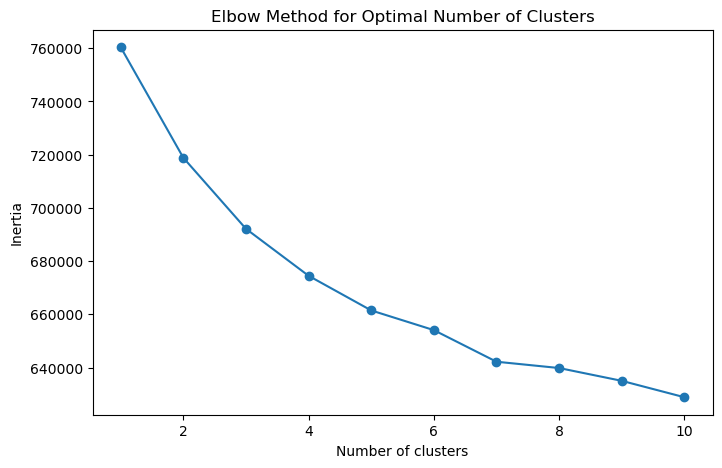

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_preprocessed)

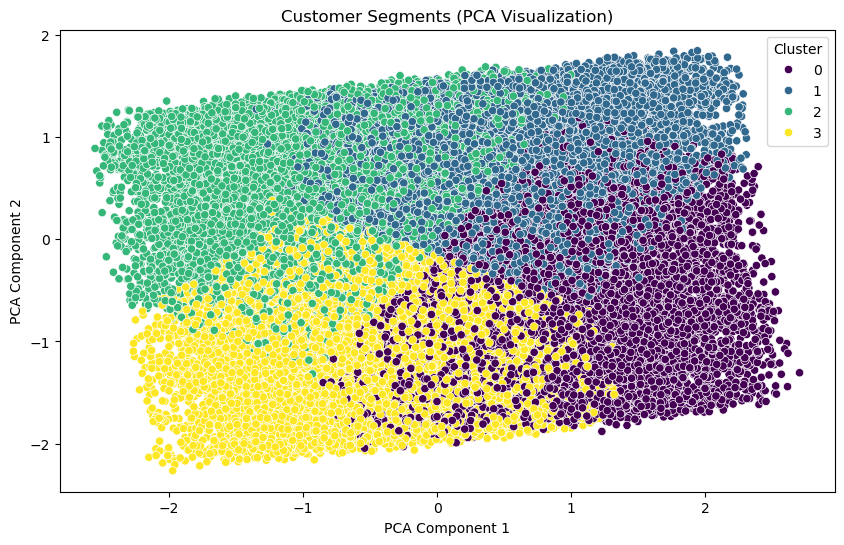

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [44]:
silhouette_avg = silhouette_score(X_preprocessed, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.04


In [54]:
for cluster_num in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_num]
    print(f'Cluster {cluster_num} Statistics:')
    print(cluster_data.describe(include='all'))  # Include all columns in the statistics
    print('\n')

Cluster 3 Statistics:
          Customer ID             A Gender Marital Status Education Level  \
count    12189.000000  12189.000000  12189          12189           12189   
unique            NaN           NaN      2              5               5   
top               NaN           NaN   Male       Divorced       Doctorate   
freq              NaN           NaN   6537           3139            2899   
mean     52373.367462     43.991550    NaN            NaN             NaN   
std      27979.740883     15.020542    NaN            NaN             NaN   
min          1.000000     18.000000    NaN            NaN             NaN   
25%      29237.000000     32.000000    NaN            NaN             NaN   
50%      56223.000000     42.000000    NaN            NaN             NaN   
75%      75843.000000     56.000000    NaN            NaN             NaN   
max     100000.000000     70.000000    NaN            NaN             NaN   

       Geographic Information   Occupation   Income L

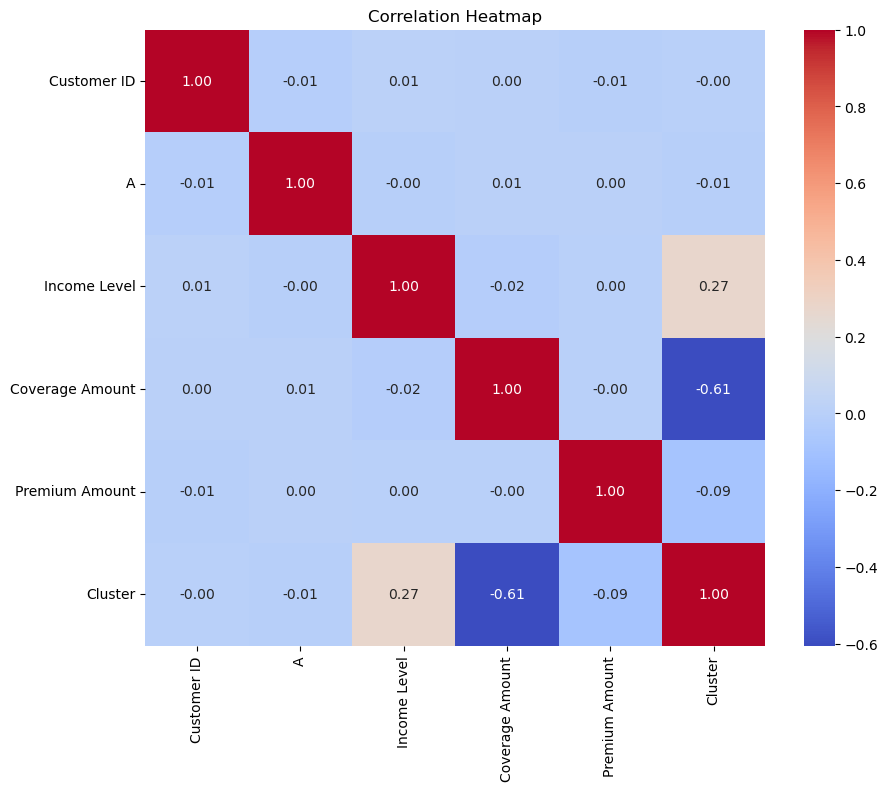

In [62]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13728\3004194117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


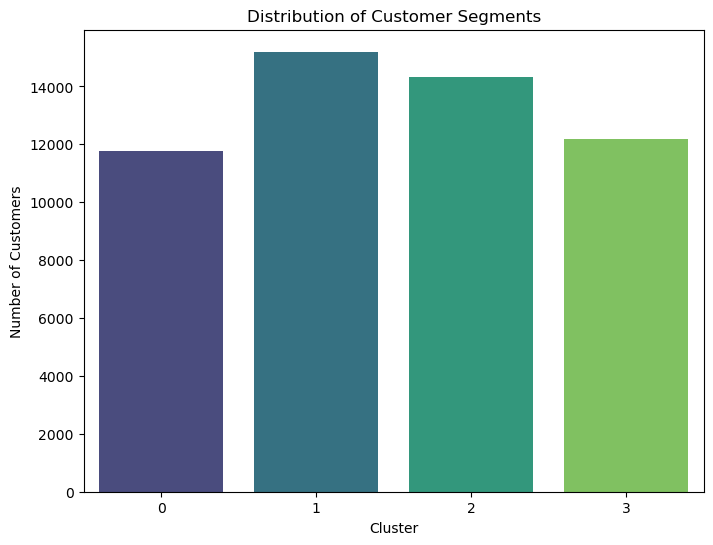

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [72]:
for cluster_num in range(optimal_clusters):
    print(f'Cluster {cluster_num} Insights:')
    print(f"- Targeted marketing for {cluster_num} customers...")
    print('\n')

Cluster 0 Insights:
- Targeted marketing for 0 customers...


Cluster 1 Insights:
- Targeted marketing for 1 customers...


Cluster 2 Insights:
- Targeted marketing for 2 customers...


Cluster 3 Insights:
- Targeted marketing for 3 customers...


